In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Problem 1 : Integration: Trapezoid and Midpoint ###



The exact value of the integral is 2.328423e-01
With 50 partitions:
The midpoint estimate is 2.327178e-01
The Trapezoid estimate is 2.334008e-01


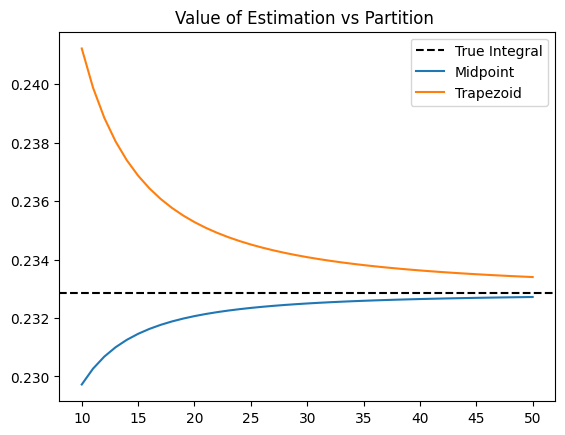

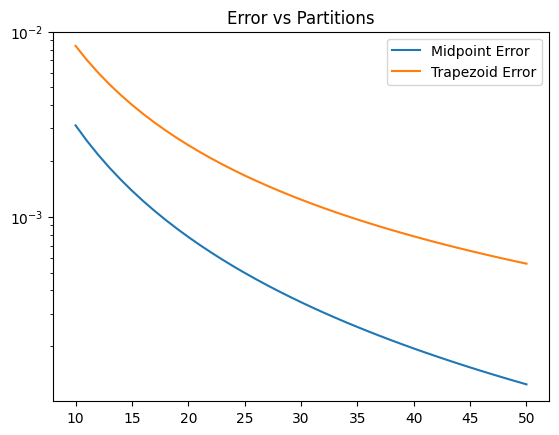

In [3]:
def f(x):
    return np.cos(2*x)*np.exp(-3*x)

def midpoint(f, n, a, b):
    #f: function 
    #n: # of partitions
    #a, b: bounds 

    sum = 0
    x = np.linspace(a, b, n+1)
    # h = x[1]-x[0]
    h = (b-a)/n

    for i in range(n):
        sum += f((x[i]+x[i+1]) / 2)

    return sum * h

def trapezoid(f, n, a, b):
    #f: function 
    #n: # of partitions
    #a, b: bounds 

    x = np.linspace(a, b, n+1)
    sum = f(x[0])+f(x[-1])
    h = (b-a)/n

    for i in range(1,n-1):
        sum += 2*f((x[i]))
    
    return (h/2)*sum 

def partvsval(Iestimator):
    numParts = np.linspace(10,50, 41)
    estimates = []

    for bins in range(10,51):
        estimates.append(Iestimator(f, bins, 0, np.pi/2))

    return (numParts, estimates)


exactI = (3/13)*(1+np.exp(-3*np.pi/2))

midData = partvsval(midpoint)
trapData = partvsval(trapezoid)

bins = midData[0]

print(f'The exact value of the integral is {exactI:.6e}')
print(f'With {bins[-1]:.0f} partitions:')
print(f'The midpoint estimate is {midData[1][-1]:.6e}')
print(f'The Trapezoid estimate is {trapData[1][-1]:.6e}')



plt.axhline(y = exactI, label = 'True Integral', color = 'black', linestyle = 'dashed')
plt.plot(midData[0], midData[1], label = 'Midpoint')
plt.plot(trapData[0], trapData[1], label = 'Trapezoid')
plt.title('Value of Estimation vs Partition ')
plt.legend()
plt.show()
# # estI = midpoint(f, 10, 0, np.pi/2)

midPointErr = []
trapErr = []

for i in range(len(midData[1])):
    midPointErr.append(abs(exactI-midData[1][i]))
    trapErr.append(abs(exactI - trapData[1][i]))

plt.semilogy(bins, midPointErr, label= 'Midpoint Error')
plt.semilogy(bins, trapErr, label = 'Trapezoid Error')
plt.ylim(top = 1e-2)
plt.title('Error vs Partitions')
plt.legend()
plt.show()

### Problem 2: Integration: Gauss-Legendre ###

### Problem 3: ODE: Euler ###

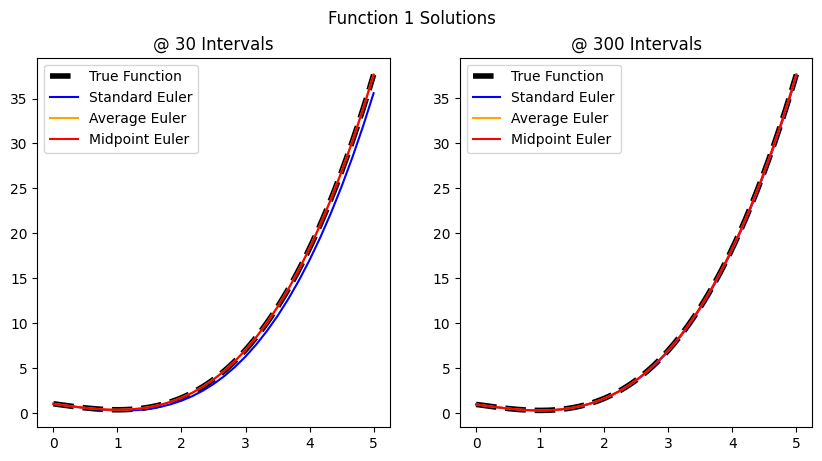

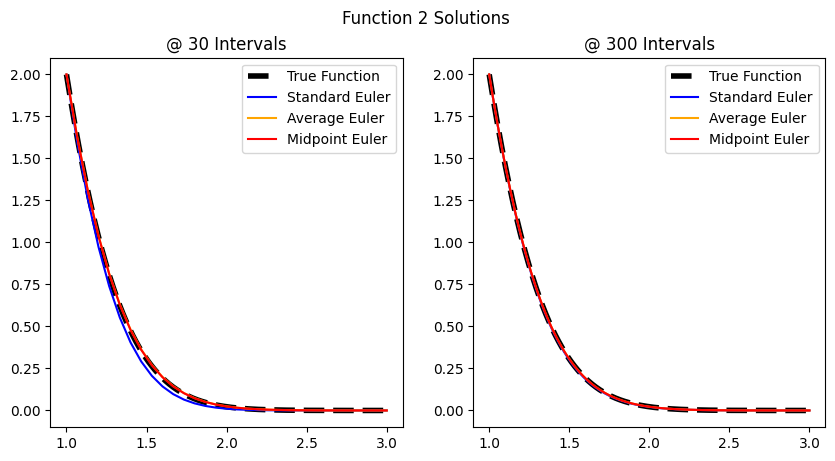

In [100]:
def ODE1(x, y, t=False):
    if t: 
        return (x**3)/3 - x + 1
    else:
        return x**2 - 1
    
def ODE2(x, y, t=False):
    if t: 
        return 2*np.exp((-3/2)*(x**2-1))
    else:  
        return -3*x*y

def standardEuler(df, a, b, start, n):
    # df: differential equation 
    # [a,b] integration bounds 
    # n - # of intervals 
    # start - initial value 

    h = (b-a)/n
    xlist = np.linspace(a,b,n+1)
    ylist = [start]

    for i in range(n): 
        yold = ylist[i]
        ynew = yold + h*df(xlist[i], ylist[i])
        ylist.append(ynew)
    
    return (xlist, ylist)

def avgEuler(df, a, b, start, n):
    # df: differential equation 
    # [a,b] integration bounds 
    # n - # of intervals 
    # start - initial value 

    h = (b-a)/n
    xlist = np.linspace(a,b,n+1)
    ylist = [start]

    for i in range(n):
        x = xlist[i]
        y = ylist[i]
        tempynext = y + h * df(x, y) 
        ynext =  y + h*(df(x,y) + df(x+h, tempynext))/2

        ylist.append(ynext)

    return xlist, ylist

def midEuler(df, a, b, start, n):
    # df: differential equation 
    # [a,b] integration bounds 
    # n - # of intervals 
    # start - initial value 

    h = (b-a)/n
    xlist = np.linspace(a,b,n+1)
    ylist = [start]

    for i in range(n):
        x = xlist[i]
        y = ylist[i]

        tempynext = y + (h/2)*df(x,y)
        ynext = y + h*df(x+h/2, tempynext)

        ylist.append(ynext)

    return xlist, ylist


### FUNCTION 1 BEGINNING ###
ODE1xlist = np.linspace(0,5,500)
ODE1Real = ODE1(ODE1xlist, 0, True)

#
##### 30 Interval Solutions for Function 1 ##### 
#

# S = Standard ::: A = Average ::: M = Midpoint 
SODE1_30 = standardEuler(ODE1, 0, 5, 1, 30) # returns 2 lists (xvalues, yvalues)
AODE1_30 = avgEuler(ODE1, 0, 5, 1, 30)
MODE1_30 = midEuler(ODE1, 0, 5, 1, 30)

func1, plots1 = plt.subplots(1,2)

func1.suptitle('Function 1 Solutions\n')
func1.set_figwidth(10, True)

plots1[0].plot(ODE1xlist, ODE1Real, label = 'True Function', linewidth = 4, linestyle = '--', c = 'k')
plots1[0].plot(SODE1_30[0], SODE1_30[1], label = 'Standard Euler', c = 'b')
plots1[0].plot(AODE1_30[0], AODE1_30[1], label = 'Average Euler', c = 'orange')
plots1[0].plot(MODE1_30[0], MODE1_30[1], label = 'Midpoint Euler', c = 'red')
plots1[0].set_title('@ 30 Intervals')
plots1[0].legend()
# func1.show()



#
##### 300 Interval Solutions for Function 1 #####
#


# S = Standard ::: A = Average ::: M = Midpoint 
SODE1_300 = standardEuler(ODE1, 0, 5, 1, 300) # returns 2 lists (xvalues, yvalues)
AODE1_300 = avgEuler(ODE1, 0, 5, 1, 300)
MODE1_300 = midEuler(ODE1, 0, 5, 1, 300)

plots1[1].plot(ODE1xlist, ODE1Real, label = 'True Function', linewidth = 4, linestyle = '--', c = 'k')
plots1[1].plot(SODE1_300[0], SODE1_300[1], label = 'Standard Euler', c = 'b')
plots1[1].plot(AODE1_300[0], AODE1_300[1], label = 'Average Euler', c = 'orange')
plots1[1].plot(MODE1_300[0], MODE1_300[1], label = 'Midpoint Euler', c = 'red')
plots1[1].set_title('@ 300 Intervals')
plots1[1].legend()
plt.show()


### FUNCTION 2 BEGINNING ###
ODE2xlist = np.linspace(1,3,500)
ODE2Real = ODE2(ODE2xlist, 0, True)

func2, plots2 = plt.subplots(1,2)
##### 30 Interval Solutions for Function 2 #####


SODE2_30 = standardEuler(ODE2, 1, 3, 2, 30) # returns 2 lists (xvalues, yvalues)
AODE2_30 = avgEuler(ODE2, 1, 3, 2, 30)
MODE2_30 = midEuler(ODE2, 1, 3, 2, 30)

func2.suptitle('Function 2 Solutions')
func2.set_figwidth(10, True)

plots2[0].plot(ODE2xlist, ODE2Real, label = 'True Function', linewidth = 4, linestyle = '--', c = 'k')
plots2[0].plot(SODE2_30[0], SODE2_30[1], label = 'Standard Euler', c = 'b')
plots2[0].plot(AODE2_30[0], AODE2_30[1], label = 'Average Euler', c = 'orange')
plots2[0].plot(MODE2_30[0], MODE2_30[1], label = 'Midpoint Euler', c = 'red')
plots2[0].set_title('@ 30 Intervals')
plots2[0].legend()

##### 300 Interval Solutions for Function 2 ####
SODE2_300 = standardEuler(ODE2, 1, 3, 2, 300) # returns 2 lists (xvalues, yvalues)
AODE2_300 = avgEuler(ODE2, 1, 3, 2, 300)
MODE2_300 = midEuler(ODE2, 1, 3, 2, 300)

plots2[1].plot(ODE2xlist, ODE2Real, label = 'True Function', linewidth = 4, linestyle = '--', c = 'k')
plots2[1].plot(SODE2_300[0], SODE2_300[1], label = 'Standard Euler', c = 'b')
plots2[1].plot(AODE2_300[0], AODE2_300[1], label = 'Average Euler', c = 'orange')
plots2[1].plot(MODE2_300[0], MODE2_300[1], label = 'Midpoint Euler', c = 'red')
plots2[1].set_title('@ 300 Intervals')
plots2[1].legend()
plt.show()


### Equation 1 Errors ### 
##### AT WORK ##### 
# ODE1EulerError = abs(ODE1_30iter[1] - ODE1(ODE1_30iter[0], 0, True))
# plt.semilogy(ODE1_30iter[0], ODE1EulerError)

# ODE1_300iter = standardEuler(ODE1, 0, 5, 1, 300) 
# plt.plot(ODE1_300iter[0], ODE1_300iter[1], label = 'Euler @ 300 Intervals', c = 'orange')

# Plot All Solutions for 30 Intervals Separate from 300 Intervals (Same for Error)
